# Постановка задачи

Дана дифференциальная задача
\begin{equation}
    \begin{cases}
        u''(x) - q(x)u(x) = -f(x),\ 0 < x<1,\\
        u(0) = A,\\
        u(1) = B,
    \end{cases}
\end{equation}
где 
- $q(x) = x$;
 
- $f(x)=|2x^2-x|$;

- $A=1$;

- $B=1$;

- $u(x) = |2x-1|$ -- точное решение.

1. Построить разностную схему, заменяя дифференциальные производные разностными;

2. Методом баланса построить консервативную схему;

3. Построить вариацинно-разностную схему методом Ритца;

4. Используя метод разностной прогонки, составить программу решения исходной задачи с помощью разностных схем п.п. 1-2, выполнить контрольные расчеты на ЭВМ и провести сравнительный анализ результатов.

Подключим все необходимые библиотеки для вычислений и для визуализации

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

Определим программно все входные данные

In [9]:
def k(x):
    return 1

def q(x):
    return x

def f(x):
    return np.absolute(2*x**2 - x)

A = 1
B = 1

Определим функцию, соответствующую точному решению дифференциальной задачи

In [10]:
def u(x):
    return np.absolute(2*x - 1)

# Построение разностной схемы

Зададим равномерную сетку узлов на отрезке $[0,1]$
	\begin{equation}
		\overline\omega_h = \left\{x_i = ih,\ i = \overline{0, N},\ h = \dfrac{1}N\right\}.
	\end{equation}

Пусть число разбиений $N=10$

In [42]:
a, b = 0, 1
N = 10
x = np.linspace(start=a, stop=b, num=N+1)
h = (b-a)/N

На этой сетке определим сеточную функцию $y = y(x)$, которая будет являться приближенным решением поставленной задачи (1).
	Заменяя дифференциальные производные разностными, можем построить разностную схему в безиндексной форме
	\begin{equation}
		\begin{dcases}
		y_{\overline x x}(x) - q(x) y(x) = -f(x),\ x \in \omega_h,\\
		y(0) = A,\\
		y(1) = B.
		\end{dcases}
	\end{equation}
	Если мы распишем все разностные производные, то получим разностную схему в индексной форме
	\begin{equation}
		\begin{dcases}
			\dfrac{y_{i+1} - 2y_i + y_{i-1}}{h^2} - q(x_i) y_i = -f(x_i),\ i = \overline{1, N-1},\\
			y_0 = A,\\
			y_N = B.
		\end{dcases}
	\end{equation}
	Исследуем порядок аппроксимации дифференциальной задачи построенной разностной схемой. Поскольку граничные условия первого рода, то они аппроксимируются точно. Следовательно погрешность разностной схемы определяется лишь погрешностью аппроксимации разностного уравнения. Рассмотрим погрешность аппроксимации разностного уравнения
	$$
	\psi_{h}(x) = u_{\overline x x}(x) - q(x)u(x) + f(x) = u''(x) + \dfrac{h^2}{12}u^{IV}(x) + O(h^4) - q(x)u(x) + f(x) = O(h^2).
	$$
	Таким образом, дифференциальное уравнение аппроксимируется на шаблоне со вторым порядком, а следовательно вся разностная схема имеет второй порядок аппроксимации.\\\\
	Чтобы применить к разностной схеме метод прогонки, выпишем коэффициенты, которые будут образовывать трехдиагональную матрицу. Если мы задаем трехдиагональную матрицу в виде
	\begin{equation}
		\begin{pmatrix} 
			\gamma_0 & \beta_0 & 0 & \ldots & 0 & 0 & \vrule & g_0 \\ 
			\alpha_1 & \gamma_1 & \beta_1 & \ldots & 0 & 0 & \vrule & g_1\\ 
			0 & \alpha_1 & \gamma_2 & \ldots & 0 & 0 & \vrule & g_2\\ 
			\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vrule & \vdots\\ 
			0 & 0 & 0 & \ldots& \gamma_{N-1} & \beta_{N-1} & \vrule & g_{N-1} \\ 
			0 & 0 & 0 & \ldots& \alpha_N& \gamma_N & \vrule & g_N\\\end{pmatrix}
	\end{equation}
	то
	в соответствии с нашей разностной схемой (4) имеем
	$$\gamma_0 = 1,\ \beta_0 = 0,\ g_0 = A,$$
	$$\alpha_i = \dfrac{1}{h^2},\ \gamma_i = -\dfrac{2}{h^2} - q(x_i), \ \beta_i =\dfrac{1}{h^2},\ g_i = -f(x_i),$$
	$$\alpha_N = 0,\ \gamma_N = 1,\ g_N = B.$$

In [43]:
gamma = [1]
beta = [0]
g = [A]
alpha = [0]
for i in range(1, N):
    alpha.append(1 / h**2)
    gamma.append(-2 / h**2 - q(x[i]))
    beta.append(1 / h**2)
    g.append(-f(x[i]))
alpha.append(0)
gamma.append(1)
g.append(B)
beta.append(0)

Покажем, что в данном случае метод прогонки сходится. Для сходимости метода необходимо выполнение следующих условий:
$$|\beta_0| \leq |\gamma _0|,\ |\alpha_i| + |\beta_i|\leq |\gamma_i|,\ |\alpha_N|\leq |\gamma_N|.$$
Действительно,
$$|\beta_0| \leq |\gamma _0| \Rightarrow 0 < 1,\ |\alpha_N| \leq |\gamma_N| \Rightarrow 0 < 1.$$
то есть первое и третье условия выполняются;
$$|\alpha_i| + |\beta_i|\leq |\gamma_i|\Rightarrow \dfrac{2}{h^2} \leq \left|-\dfrac{2}{h^2} - q(x_i)\right|,$$
выражение под модулем отрицательно, так как $h>0$, $x\in [0,1]$, тогда
$$\dfrac{2}{h^2} \leq \dfrac{2}{h^2} + q(x_i),$$
отсюда
$$q(x_i)\geq 0,$$
что верно для каждого $x_i$ из сетки $\overline \omega_h$.
Таким образом, метод прогони для реализации разностной схемы сходится.

Определим функцию для решения системы с трехдиагональной матрицей

In [44]:
def tridiagonal_algorithm(a,b,c,f):
    a, b, c, f = tuple(map(lambda k_list: list(map(float, k_list)), (a, b, c, f)))

    alpha = [-b[0] / c[0]]
    beta = [f[0] / c[0]]
    n = len(f)
    x = [0]*n

    for i in range(1, n):
        alpha.append(-b[i]/(a[i]*alpha[i-1] + c[i]))
        beta.append((f[i] - a[i]*beta[i-1])/(a[i]*alpha[i-1] + c[i]))

    x[n-1] = beta[n - 1]

    for i in range(n - 1, 0, -1):
        x[i - 1] = alpha[i - 1]*x[i] + beta[i - 1]

    return x

Теперь определим приближенное решение разностной задачи как решение системы с трехдиагональной матрицей

In [45]:
y = tridiagonal_algorithm(alpha,beta,gamma,g)

Визуализируем полученные результаты

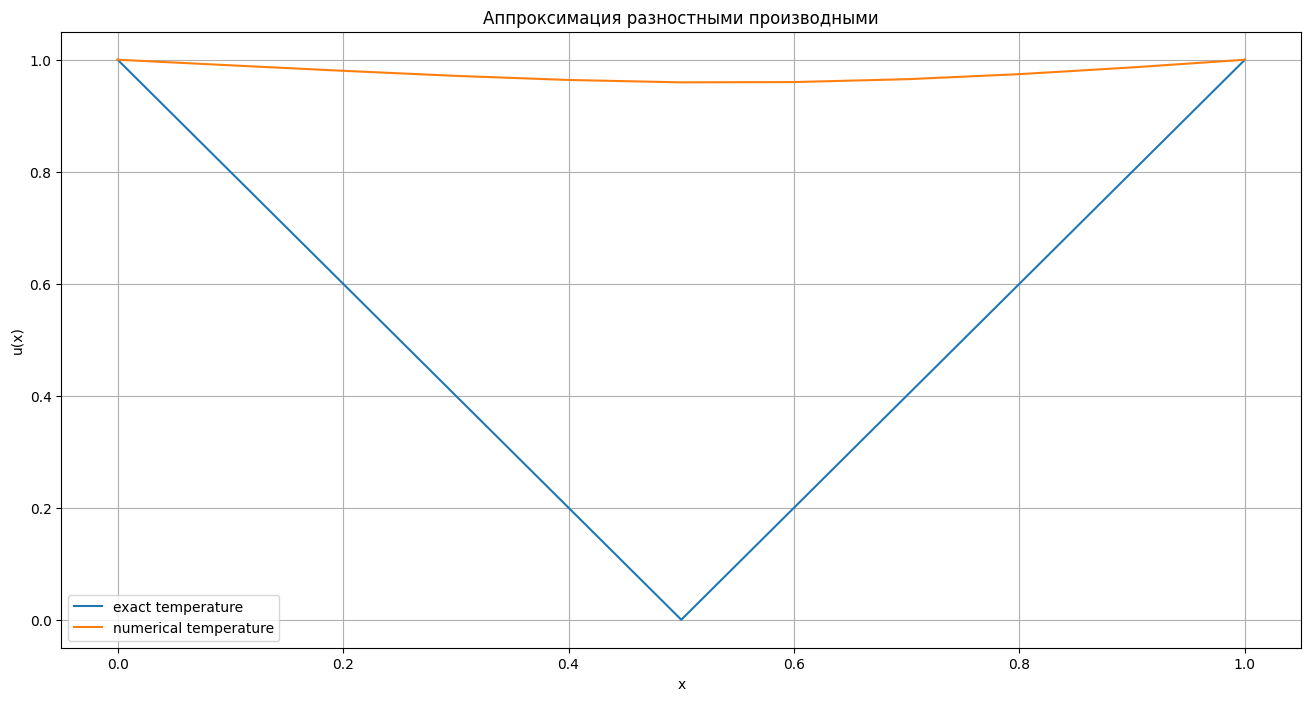

In [46]:
plt.figure(figsize=(16, 8))
plt.plot(x, u(x), label='exact temperature')
plt.plot(x, y, label='numerical temperature')
plt.title('Аппроксимация разностными производными')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()

## Метод баланса

Для построения разностной схемы нам нужно привести поставленную задачу (1) к подходящему виду. В общем случае разностная схема по методу баланса строится для задачи вида 
$$
\begin{cases}
    (k(x) u'(x))' - q(x)u(x) = -f(x), \ 0<x<1,\\
    k(0) u'(0) = \sigma_1 u(0) - \mu_1,\\
    - k(1) u'(1) = \sigma_2 u(1) - \mu_2.
\end{cases}
$$
В нашей задаче граничные условия первого порядка и $k(x) \equiv 1$.
Из предыдущего пункта мы возьмем заданную равномерную сетку узлов $\overline \omega_h$ и заданную на ней сеточную функцию $y = y(x)$.

По методу баланса можно построить разностную схему в индексном виде
\begin{equation}
    \begin{dcases}
    \dfrac{1}{h}\left(a_{i+1}\dfrac{y_{i+1} - y_i}{h} - a_i \dfrac{y_i - y_{i-1}}{h}\right)-d_iy_i = -\varphi_i,\ i=\overline {1,N-1}\\
    y_0 = A,\\
    y_N = B;
\end{dcases}
\end{equation}
где 
\begin{equation}
    a_i = \left[ \dfrac 1h \int\limits_{x_{i-1}}^{x_i} \dfrac{1}{k(x)}dx\right]^{-1},\
    d_i =\dfrac 1h \int\limits_{x_{i-\frac12}}^{x_{i+\frac12}} q(x) dx,\
    \varphi_i = \dfrac{1}{h} \int\limits_{x_{i-\frac12}}^{x_{i+\frac12}}f(x)dx,
\end{equation}
Для построения разностной схемы нужно вычислить коэффициенты (7).
Определим коэффициенты, используя входные данные, 
$$a_i = \left[ \dfrac 1h \int\limits_{x_{i-1}}^{x_i} dx\right]^{-1} = \left[\dfrac{x_i - x_{i-1}}{h}\right]^{-1} = 1,$$
$$d_i=\dfrac 1h \int\limits_{x_{i-\frac12}}^{x_{i+\frac12}} x dx = \dfrac 1 h\cdot \dfrac {x^2}{2}\Big | _{x_{i-\frac12}}^{x_{i+\frac12}}=\dfrac 1h\cdot \dfrac{((x_i-h/2)^2 - (x_i+h/2)^2)}{2} = x_i,$$
$$\varphi_i = \dfrac{1}{h} \int\limits_{x_{i-\frac12}}^{x_{i+\frac12}}|2x^2 - x|dx =[\text{все точки из } [0,1]] = \dfrac{1}{h} \int\limits_{x_{i-\frac12}}^{x_{i+\frac12}}2x^2 - xdx = \dfrac{h^2}{6} + x_i(2x_i-1),$$

In [47]:
def a_i(x, h):
    return 1

def d_i(x, h):
    return x

def phi_i(x, h):
    return h**2/6 + x*(2*x-1)

Таким образом, мы имеем общую формулу (6) для итераций и явные выражения для всех коэффициентов из этой разностной схемы. \\\\
Полученная таким образом разностная схема обладает вторым порядком аппроксимации, а также для нее сходится метод прогонки.
Запишем в соответствии с матрицей (7) вид коэффициентов для метода прогонки
$$\gamma_0 = 1,\ \beta_0 = 0,\ g_0 = A,$$
$$\alpha_i = \dfrac{a_i}{h^2},\ \gamma_i = -\dfrac{a_{i} + a_{i+1}}{h^2} - d_i, \ \beta_i =\dfrac{a_{i+1}}{h^2},\ g_i = -\varphi_i,$$
$$\alpha_N = 0,\ \gamma_N = 1,\ g_N = B.$$

In [48]:
gamma = [1]
beta = [0]
g = [A]
alpha = [0]
for i in range(1, N):
    alpha.append(a_i(x[i], h) / h**2)
    gamma.append(-(a_i(x[i],h) + a_i(x[i+1],h))/h**2 - d_i(x[i], h))
    beta.append(a_i(x[i+1], h) / h**2)
    g.append(-phi_i(x[i], h))
alpha.append(0)
gamma.append(1)
g.append(B)
beta.append(0)

Теперь определим приближенное решение разностной задачи как решение системы с трехдиагональной матрицей

In [49]:
y = tridiagonal_algorithm(alpha,beta,gamma,g)

Визуализируем полученные результаты

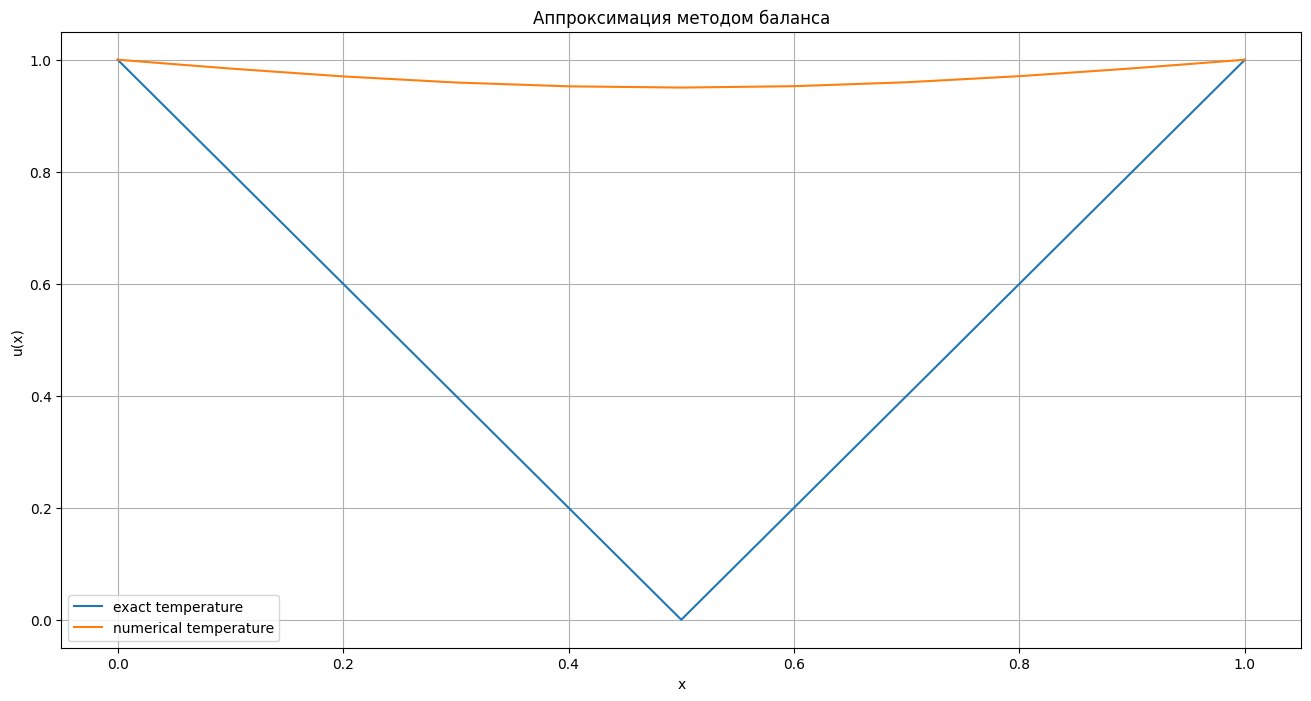

In [50]:
plt.figure(figsize=(16, 8))
plt.plot(x, u(x), label='exact temperature')
plt.plot(x, y, label='numerical temperature')
plt.title('Аппроксимация методом баланса')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()

## Метод Ритца

Из первого пункта мы возьмем заданную равномерную сетку узлов $\overline \omega_h$ и заданную на ней сеточную функцию $y = y(x)$.

По методу Ритца мы можем построить трехдиагональную систему вида
\begin{equation}
    \begin{cases}
        \tilde\alpha_{ii-1} y_{i-1} + \tilde\alpha_{ii} y_i + \tilde\alpha_{i i+1} y_{i+1} = \tilde\beta_i,\ i = \overline {1, N -1},\\
        y_0 = A,\\
        y_N = B,
    \end{cases}
\end{equation}
где $$\tilde\alpha_{ii} = \dfrac{1}{h^2}\left[ \int\limits_{x_{i-1}}^{x_{i+1}} k(x)dx +\int\limits_{x_{i-1}}^{x_i}q(x)(x-x_{i-1})^2dx + \int\limits_{x_i}^{x_{i+1}}q(x)(x_{i+1}-x)^2dx \right],\ i = \overline{1, N-1},$$
$$\tilde\alpha_{ii+1} = \dfrac{1}{h^2} \left[-\int\limits_{x_i}^{x_{i+1}}k(x)dx + \int\limits_{x_i}^{x_{i+1}}q(x)(x-x_i)(x_{i+1} - x)dx\right],\ i = \overline {0, N-1},$$
причем $\alpha_{ii+1} = \alpha_{i+1i}$;
$$\tilde\beta_i = \dfrac{1}{h} \left[\int\limits_{x_{i-1}}^{x_i}f(x)(x-x_{i-1})dx + \int\limits_{x_i}^{x_{i+1}}f(x)(x_{i+1}-x)dx\right],\ i = \overline{1, N-1}.$$
Тогда, подставляя известные значения и вычисляя точные значения интегралов, получим
$$\tilde\alpha_{ii} = \dfrac 2 3 x_i h + \dfrac 2 h,$$
$$\tilde\alpha_{ii+1} = \dfrac 2 3 x_i + \dfrac{h^2}4 - \dfrac 1 h,$$
$$\tilde\alpha_{ii-1} = \dfrac 2 3 x_i - \dfrac{h^2}4 - \dfrac 1 h,$$
$$\tilde\beta_i = 2x_i^2 -x_i + \dfrac{h^2}{3}.$$
Полученная таким образом разностная схема обладает вторым порядком аппроксимации, а также для нее сходится метод прогонки.\\\\
Для нее коэффициенты метода прогонки возьмем следующие
$$\gamma_0 = 1,\ \beta_0 = 0,\ g_0 = A,$$
$$\alpha_i = \tilde\alpha_{ii-1},\ \gamma_i = \tilde\alpha_{ii}, \ \beta_i=\tilde\alpha_{ii+1},\ g_i = \tilde\beta_i,$$
$$\alpha_N = 0,\ \gamma_N = 1,\ g_N = B.$$

In [51]:
def alpha_ii(x_i, h):
    return 2/3*x_i*h + 2/h

def alpha_ii_plus_1(x_i, h):
    return 2/3*x_i + h**2/4 - 1/h

def alpha_ii_minus_1(x_i, h):
    return 2/3*x_i - h**2/4 - 1/h

def beta_i(x_i, h):
    return 2*x_i**2 - x_i + h**2 / 3

Как и в методе баланса сведем решение разностной задачи к решению системы с трехдиагональной матрицей

In [52]:
gamma = [1]
beta = [0]
g = [A]
alpha = [0]
for i in range(1, N):
    alpha.append(alpha_ii_minus_1(x[i], h))
    gamma.append(alpha_ii(x[i], h))
    beta.append(alpha_ii_plus_1(x[i], h))
    g.append(beta_i(x[i], h))
alpha.append(0)
gamma.append(1)
g.append(B)
beta.append(0)

Теперь определим приближенное решение разностной задачи как решение системы с трехдиагональной матрицей

In [53]:
y = tridiagonal_algorithm(alpha,beta,gamma,g)

Визуализируем полученные результаты

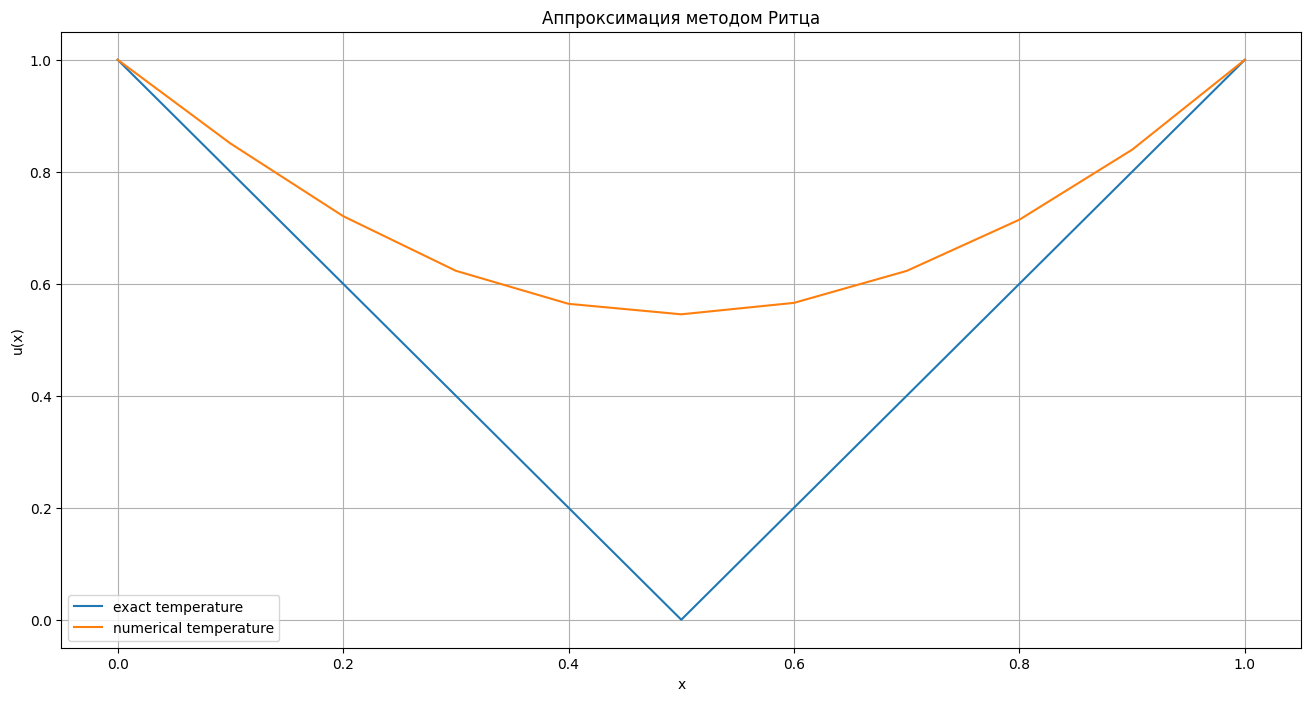

In [54]:
plt.figure(figsize=(16, 8))
plt.plot(x, u(x), label='exact temperature')
plt.plot(x, y, label='numerical temperature')
plt.title('Аппроксимация методом Ритца')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()

Таким образом, как можно видеть из графиков, аппроксимация по методу Ритца оказалась ближе всего к реальному решению. Остальные методы аппроксимации дают менее точный результат.